In [1]:
import pandas as pd

ua_full_path = '{}/{}'.format(base_path,'ignore/part-00000-359dcc8b-529c-420a-ae4a-bec5c36f625c-c000.csv')
ap_full_path = '{}/{}'.format(base_path,'pos_accept/part-00000-81948405-8a39-4236-b3fa-7ca3b085468b-c000.csv')
an_full_path='{}/{}'.format(base_path,'neg_accpet/part-00000-ffe19c4b-81b6-4310-bf42-eb02b1697f4d-c000.csv')


In [2]:
ua_model_df= pd.read_csv(ua_full_path)
ua_model_df.head()

,model,os_version
0,SO-02K,9
1,SO-02K,9
2,SO-02K,9
3,SO-02K,9
4,SO-01L,9


In [3]:
ap_model_df =pd.read_csv(ap_full_path)
ap_model_df.head()

,model,os_version
0,SC-01K,9
1,SC-02L,8.1.0
2,SO-03K,9
3,SC-02K,9
4,SC-02K,9


In [4]:
an_model_df =pd.read_csv(an_full_path)
an_model_df.head()

,model,os_version
0,SC-01L,9
1,SH-01L,8.1.0
2,SC-01L,9
3,SC-01L,9
4,SC-01L,9


In [5]:
ua_model_count_df = ua_model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='ua_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
ua_model_count_df.head()

,model,ua_model_count
0,SH-01L,213222
1,SO-01L,172191
2,SO-01K,169684
3,SH-03K,106262
4,SC-02L,101329


In [6]:
ap_model_count_df = ap_model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='ap_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
ap_model_count_df.head()

,model,ap_model_count
0,SH-01L,2691
1,SO-01K,2201
2,SO-02K,1548
3,SO-01L,1519
4,SO-03K,1340


In [7]:
an_model_count_df = an_model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='an_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
an_model_count_df.head()

,model,an_model_count
0,SO-01K,1519
1,SH-01L,1412
2,SO-02K,922
3,SO-01L,830
4,SO-03K,726


In [25]:
result_df = pd.merge(ua_model_count_df,ap_model_count_df, on='model', how='inner')
result_df = pd.merge(result_df,an_model_count_df, on='model', how='inner')
result_df.head(20)

,model,ua_model_count,ap_model_count,an_model_count
0,SH-01L,213222,2691,1412
1,SO-01L,172191,1519,830
2,SO-01K,169684,2201,1519
3,SH-03K,106262,1100,627
4,SC-02L,101329,927,493
5,SO-03K,95125,1340,726
6,SO-02K,85975,1548,922
7,SC-02K,83778,1026,602
8,SC-01L,55561,348,240
9,SO-05K,52909,789,510


In [26]:
result_df['sum'] = result_df[['ua_model_count','ap_model_count','an_model_count']].sum(axis=1)
#result_df.head()
result_df.head(20)

,model,ua_model_count,ap_model_count,an_model_count,sum
0,SH-01L,213222,2691,1412,217325
1,SO-01L,172191,1519,830,174540
2,SO-01K,169684,2201,1519,173404
3,SH-03K,106262,1100,627,107989
4,SC-02L,101329,927,493,102749
5,SO-03K,95125,1340,726,97191
6,SO-02K,85975,1548,922,88445
7,SC-02K,83778,1026,602,85406
8,SC-01L,55561,348,240,56149
9,SO-05K,52909,789,510,54208


In [27]:
result_df['ua_perc']= round(result_df['ua_model_count']/result_df['sum'] * 100,4)
result_df['ap_perc']= round(result_df['ap_model_count']/result_df['sum'] * 100,4)
result_df['an_perc']= round(result_df['an_model_count']/result_df['sum'] * 100,4)
result_df= result_df[['model','ua_perc','ap_perc','an_perc','sum']]
result_df=result_df.sort_values('ap_perc',ascending=False).reset_index()
result_df.head(15)

,index,model,ua_perc,ap_perc,an_perc,sum
0,13,F-04K,88.9359,8.0338,3.0303,1419
1,6,SO-02K,97.2073,1.7502,1.0425,88445
2,9,SO-05K,97.6037,1.4555,0.9408,54208
3,5,SO-03K,97.8743,1.3787,0.7470,97191
4,2,SO-01K,97.8547,1.2693,0.8760,173404
5,0,SH-01L,98.1120,1.2382,0.6497,217325
6,7,SC-02K,98.0938,1.2013,0.7049,85406
7,12,SO-04K,98.4193,1.1427,0.4380,26254
8,3,SH-03K,98.4008,1.0186,0.5806,107989
9,4,SC-02L,98.6180,0.9022,0.4798,102749


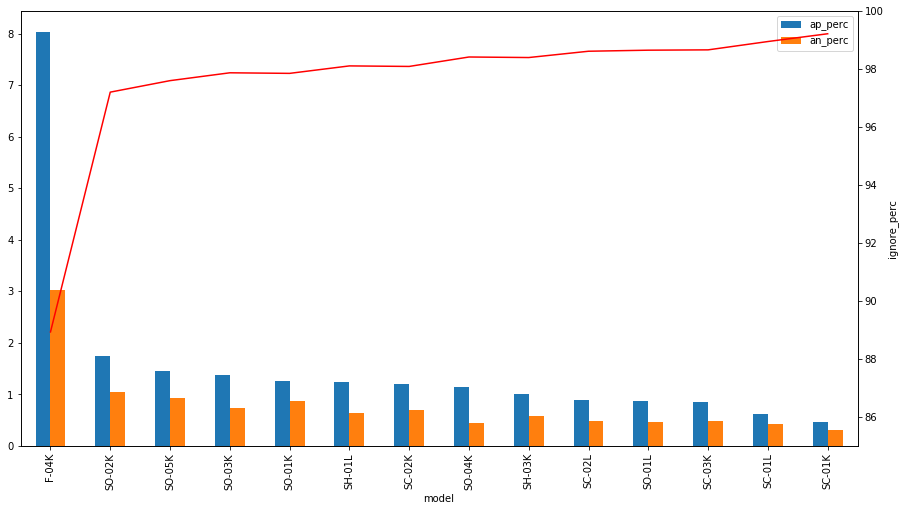

In [28]:
from numpy import array
from matplotlib import pyplot as plt
import numpy as np

ax1 = plt.gca()
ind = result_df['ua_perc']
ind_arr =  array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
result_df.plot(x="model", y=['ap_perc','an_perc'], kind="bar",ax=ax1,figsize=(15,8))
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r-')
ax2.set_ylabel('ignore_perc')
ax2.set_ylim((85.0,100.0))
plt.show()

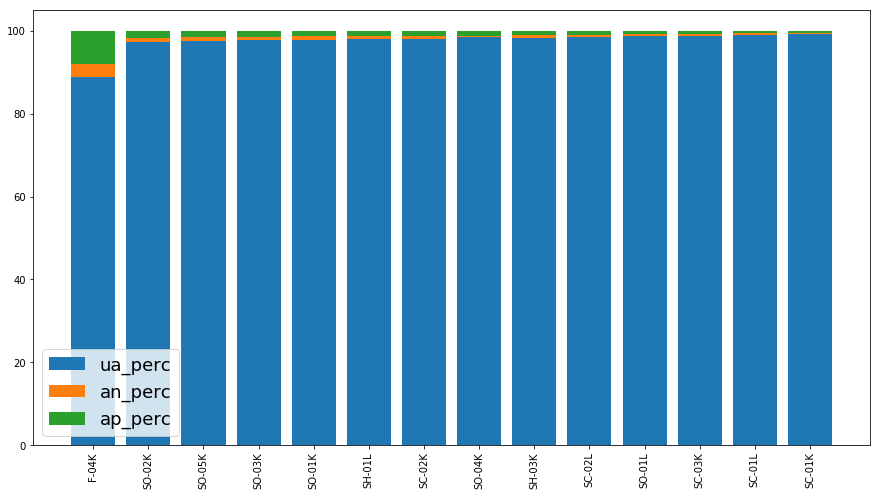

In [29]:
result_df_stack_bar = result_df[['model','ua_perc','an_perc','ap_perc']]
cumval=0
fig = plt.figure(figsize=(15,8))
for col in result_df_stack_bar.columns[~result_df_stack_bar.columns.isin(['model'])]:
    plt.bar(result_df_stack_bar.model, result_df_stack_bar[col], bottom=cumval, label=col)
    cumval = cumval+result_df_stack_bar[col]

_ = plt.xticks(rotation=90)
_ = plt.legend(fontsize=18)

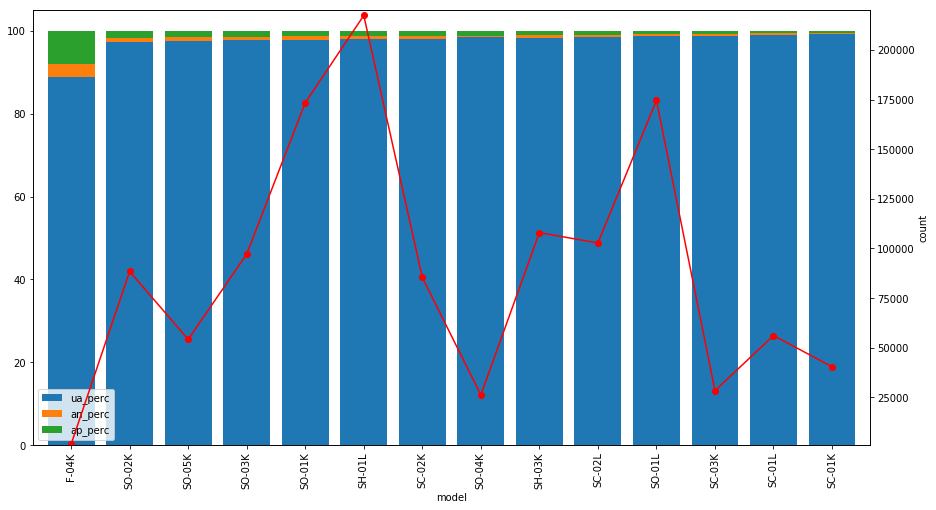

In [31]:
from numpy import array
import numpy as np
ax1 = plt.gca()
ind = result_df['sum']
ind_arr = array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
result_df.plot(x="model", y=['ua_perc','an_perc','ap_perc'], kind="bar",stacked=True,ax=ax1,figsize=(15,8),width=0.8)
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r--', linestyle='-', marker='o', color='red')
ax2.set_ylabel('count')
ax2.set_ylim((1000,220000))
plt.show()